# Movie Rating Prediction Project 

**Authors**: Lorent Shabani 
**Project**: Demo (Project 8)  
**Hypothesis**: Can I predict whether I’ll give a movie a high rating (≥4) based on its attributes like genre, release year, and runtime?

This notebook will walk through our process of testing this hypothesis using data from Letterboxd.


# Explanation:
We collected data of movies that Lorent watched for over three years, using an app called **Letterboxd**.
- LetterBoxd is an app created for film "enthusiasts" to log movies and Tv shows that they watch and rate them on a scale from 0-5 stars, with the option to like the movie if it was a film you enjoyed watching.
- In total, I logged 203 films.

I love watching films, Most people read books in their past time but I was never much of a reader, but when I opened up and started watching all kinds of films I got addicted to them. so when I found out about Letterboxd I had to sign up and get started on logging what I watch.
- Doing this made it easier for me to look back and remind myself of what I've watched and enjoyed watching and think about the aspects of that film that made it so enjoyable to watch, and to remind myself of the terrible movies I've seen and laugh at the mere fact of their existence. 

- This app is also great for finding new movies to watch, there are some crazy, thought provoking, and unique films that most people don't know of as well as genres of film that are very underappreciated. From old films from the 1920s to films in the early 2000s, films from different countries like France, Italy, Germany, and everywhere else in the world, it allows you to open up and experience different styles of film making and perspectives that one rarely or never sees. 

# Part 1: Data Preperation

We got our data in two seperate files, our first file **Films I've rated.csv**, which contains all 203 films that I've watched and rated. 

Our second file **Films I've liked** contains all the films that I've liked, which were films that no matter the rating, I still enjoyed it to which I gave it a like.


In [10]:
import pandas as pd

# loads both csv files
liked_df = pd.read_csv('C:/Users/Shaba/Downloads/DA8Demo/Films_ive_liked.csv')
rated_df = pd.read_csv('C:/Users/Shaba/Downloads/DA8Demo/Films_ive_rated.csv')

# displays first 5 rows of each df
print("Liked Movies Data:")
display(liked_df.head())

print("Rated Movies Data:")
display(rated_df.head())


Liked Movies Data:


,Date,Name,Year,Letterboxd URI
0,2022-12-30,Parasite,2019,https://boxd.it/hTha
1,2024-02-18,Eternal Sunshine of the Spotless Mind,2004,https://boxd.it/6YK
2,2024-02-18,La La Land,2016,https://boxd.it/a5fa
3,2024-02-18,Donnie Darko,2001,https://boxd.it/2b2A
4,2024-02-18,Saltburn,2023,https://boxd.it/z4eg


Rated Movies Data:


,Date,Name,Year,Letterboxd URI,Rating
0,2022-12-30,Parasite,2019,https://boxd.it/hTha,4.0
1,2022-12-30,Joker,2019,https://boxd.it/h4cS,5.0
2,2022-12-30,Fight Club,1999,https://boxd.it/2a9q,5.0
3,2022-12-30,The Batman,2022,https://boxd.it/eDGs,4.0
4,2022-12-30,Pulp Fiction,1994,https://boxd.it/29Pq,5.0


## Data Preperation Continued...

We didn't want to have two seperate data sets, with practically the same data, so we decided to merge our liked films data together with our rated films data, so that it was one big data set. To further prepare for our linear regression testing, I made an additional column named **high_rating** so that the original 1–5 movie ratings were converted to a binary variable (1 or 0) so that if it had a high rating of 4 or above It got 1, otherwise it got a 0.

In [21]:
# Add a 'liked' column to rated_df based on whether the movie is in liked_df

# Get the list of liked movie names
liked_movies = liked_df['Name'].unique()

# Create the 'liked' column: 1 if in liked list, 0 otherwise
rated_df['liked'] = rated_df['Name'].apply(lambda x: 1 if x in liked_movies else 0)

# Create the 'high_rating' column: 1 if rating >= 4, else 0
rated_df['high_rating'] = rated_df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Check a sample of the new dataframe
display(rated_df.head())

,Date,Name,Year,Letterboxd URI,Rating,liked,Genre,Runtime,high_rating
0,2022-12-30,Parasite,2019,https://boxd.it/hTha,4.0,1,"Drama, Thriller",132.0,1
1,2022-12-30,Joker,2019,https://boxd.it/h4cS,5.0,0,"Crime, Drama, Thriller",122.0,1
2,2022-12-30,Fight Club,1999,https://boxd.it/2a9q,5.0,0,"Crime, Drama, Thriller",139.0,1
3,2022-12-30,The Batman,2022,https://boxd.it/eDGs,4.0,0,"Action, Crime, Drama",176.0,1
4,2022-12-30,Pulp Fiction,1994,https://boxd.it/29Pq,5.0,0,"Crime, Drama",154.0,1


## Data Preperation: Further Enriched Data Set using OMDb Api

To answer our first hypothesis question, we needed the **Genre** and **Runtime** of each film that I've logged, and to do that we found an api from the website **[omdbapi](https://www.omdbapi.com/)** that every detail that you can think of for every movie thats out there. 

- To do this, I used our merged data set that I created and made a program that scraped all of the genres and runtime for each one of the films I"ve logged and added it in a new column on my .csv file next to the designated movie. 
 At this point, we have a merged data set of my liked and rated films with an addition of the genre(s) and runtime of each film.

In [ ]:
import requests
import time

#  OMDb API key
api_key = "5283aeb6"

# Function to fetch genre and runtime from OMDb API
def fetch_omdb_data(title):
    try:
        response = requests.get(f"http://www.omdbapi.com/?t={title}&apikey={api_key}")
        data = response.json()
        if data['Response'] == 'True':
            genre = data.get('Genre', 'N/A')
            runtime = data.get('Runtime', 'N/A')
        else:
            genre = 'N/A'
            runtime = 'N/A'
    except Exception as e:
        genre = 'Error'
        runtime = 'Error'
    return pd.Series([genre, runtime])

# Apply to each row
rated_df[['Genre', 'Runtime']] = rated_df['Name'].apply(lambda x: fetch_omdb_data(x))

#  Convert runtime to integer minutes if needed
rated_df['Runtime'] = rated_df['Runtime'].apply(lambda x: int(x.replace(" min", "")) if "min" in x else None)

# Display
display(rated_df.head())

,Date,Name,Year,Letterboxd URI,Rating,liked,Genre,Runtime
0,2022-12-30,Parasite,2019,https://boxd.it/hTha,4.0,1,"Drama, Thriller",132.0
1,2022-12-30,Joker,2019,https://boxd.it/h4cS,5.0,0,"Crime, Drama, Thriller",122.0
2,2022-12-30,Fight Club,1999,https://boxd.it/2a9q,5.0,0,"Crime, Drama, Thriller",139.0
3,2022-12-30,The Batman,2022,https://boxd.it/eDGs,4.0,0,"Action, Crime, Drama",176.0
4,2022-12-30,Pulp Fiction,1994,https://boxd.it/29Pq,5.0,0,"Crime, Drama",154.0


## Part 2: Hypothesis Testing Using Linear Regression (5 Step Test)

My Hypothesis Question:

**Can I predict whether I’ll give a movie a high rating (≥4) based on its attributes like genre, release year, and runtime?** 

**Step 1: Stating null & alternative hypothesis**
$$
H_0: \text{The attributes (genre, release year, runtime) do not predict whether a movie receives a high rating (} \geq 4 \text{)}
$$
$$
H_1: \text{The attributes (genre, release year, runtime) do predict whether a movie receives a high rating (} \geq 4 \text{)}
$$

**Step 2: Level of Significance:**

$$
\alpha = 0.05
$$

- I decided to go with this level of significance based on the fact that it is an acceptable threshold for social sciences and behavorial studies, and that I'm not working with **serious** data (life or death).


**Step 3: Model Equation (Linear Regression):**

$$
\hat{y} = \beta_0 + \beta_1 \cdot \text{Genre} + \beta_2 \cdot \text{ReleaseYear} + \beta_3 \cdot \text{Runtime} + \epsilon
$$

Where:

- $( \hat{y} )$: Predicted outcome (e.g., probability of a high rating)
- $( \beta_0 )$: Intercept (baseline prediction when all features are 0)
- $( \beta_1 )$: Coefficient for **Genre** (effect of movie genre on the rating)
- $( \beta_2 )$: Coefficient for **ReleaseYear** (effect of movie release year on the rating)
- $( \beta_3 )$: Coefficient for **Runtime** (effect of movie runtime on the rating)
- $( \epsilon )$: Error term (random variation not explained by the model)

Model Setup

## Step 4: Hypothesis Testing Using Logistic Regression

### Model Setup and Further Preparation

To evaluate whether a movie's **genre**, **release year**, and **runtime** could predict whether I would give it a **high rating (≥ 4)**, we implemented a logistic regression model using `statsmodels`.

### Even more data cleaning...

Before fitting the model, I had to perform extensive data preparation to clean and structure the data for proper model training:

1. **Started with all rated films**:  
   We used `rated_df`, which contains my ratings along with metadata such as title, year, runtime, and genres.

2. **Converted `Runtime` to numeric**:  
   Since OMDb provides runtime as strings (e.g., `"142 min"`), we converted them to integers using `pd.to_numeric(errors='coerce')`.

3. **Removed incomplete records**:  
   Any row missing data in `Genre`, `Runtime`, `Year`, or `high_rating` was dropped to ensure a complete and valid dataset.

4. **Handled multi-label genres**:  
   OMDb often returns combined genres like `"Action, Thriller"`. To extract useful signals, we:
   - Split each genre string into a list of individual genres
   - Used `pd.get_dummies` to create binary flags for each unique genre
   - Grouped and restructured the dataset to reflect **multi-genre presence** per movie

5. **Reduced rare genres**:  
   To avoid multicollinearity and overfitting, we only kept genres that appeared in **at least 4 movies** (a tunable threshold).

6. **Built the feature matrix (`X`)**:  
   We combined:
   - The filtered genre dummies
   - `Year`
   - `Runtime`  
   Then we removed any constant columns that contained no variation across the dataset.

7. **Prepared the target (`y`)**:  
   The `high_rating` variable was already created earlier, where:
   - `1` = I gave the movie a rating of 4 or 5  
   - `0` = I rated it below 4

8. **Fitted the logistic regression model**:  
   We used `statsmodels.Logit` to fit the model and retrieved p-values for each feature. This allowed us to evaluate the significance of each predictor in relation to high ratings.


### Summary

After much testing and reiterations to make this code work, we could finally produce an output worthy of interpretation.

**Step 4: Hypothesis Testing using linear regression:**

In [28]:
# Step 1: Expand genre strings into individual genre flags
df = rated_df.copy()
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df = df.dropna(subset=['Genre', 'Runtime', 'Year', 'high_rating'])

# Split genres by comma and strip spaces
df['GenreList'] = df['Genre'].apply(lambda x: [g.strip() for g in x.split(',')])

# Convert list of genres into individual binary columns (multi-label binarization)
all_genres = pd.get_dummies(df['GenreList'].explode()).groupby(level=0).sum()

# Optionally filter genres that appear at least 3 times
valid_genres = all_genres.sum()[all_genres.sum() >= 3].index
filtered_genres = all_genres[valid_genres]

# Combine features
X = pd.concat([filtered_genres, df[['Year', 'Runtime']]], axis=1)
X = X.loc[:, X.nunique() > 1]  # drop constant cols
X = sm.add_constant(X).astype(float)
y = df['high_rating'].astype(float)

# Fit model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Show p-values
print("P-values for each feature:")
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.538073
         Iterations 7
P-values for each feature:
const        0.823453
Action       0.748097
Adventure    0.892358
Animation    0.215355
Biography    0.019977
Comedy       0.380448
Crime        0.456596
Drama        0.986261
Family       0.145833
Fantasy      0.258582
History      0.782192
Horror       0.304734
Music        0.864027
Mystery      0.145234
Romance      0.021382
Sci-Fi       0.881757
Sport        0.737420
Thriller     0.007884
War          0.897683
Year         0.837525
Runtime      0.101895
dtype: float64


# A visual representation of my model:

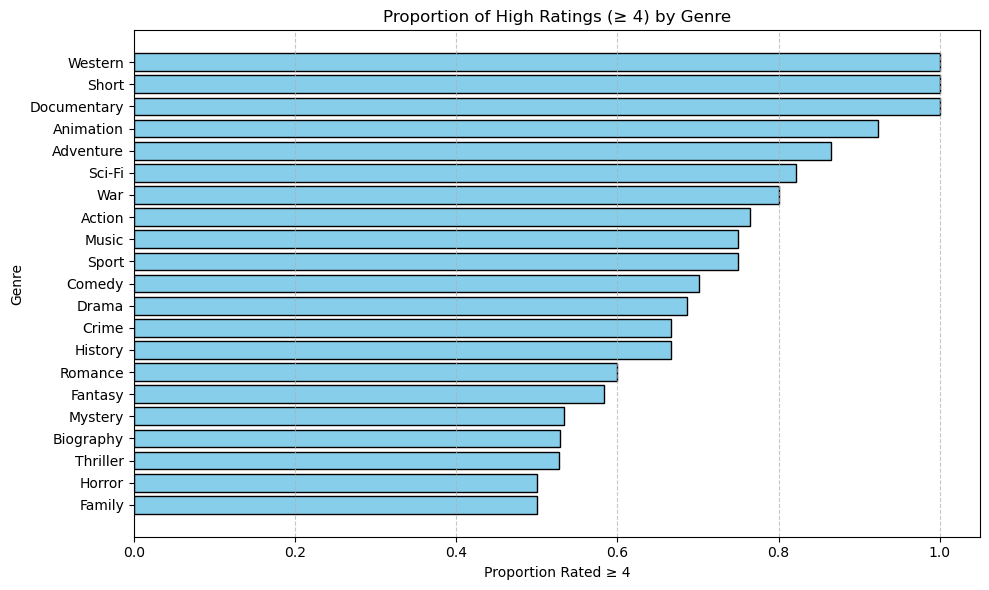

In [31]:
import matplotlib.pyplot as plt

# Prepare data
df = rated_df.copy()
df['high_rating'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Split genres into individual tags
df['GenreList'] = df['Genre'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])

# Explode the genre list so each genre gets its own row
exploded = df.explode('GenreList')

# Group by genre and calculate mean high rating
genre_rating = exploded.groupby('GenreList')['high_rating'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(genre_rating.index, genre_rating.values, color='skyblue', edgecolor='black')
plt.title('Proportion of High Ratings (≥ 4) by Genre')
plt.xlabel('Proportion Rated ≥ 4')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart above visualizes the relationship between **movie genre** and the **proportion of high ratings (≥ 4 stars)** I gave across my entire dataset.

- **X-axis (Proportion Rated ≥ 4):**
  - This represents the **percentage of movies in each genre** that I gave a high rating to (4 or 5 stars)

- **Y-axis (Genre):**
  - This lists all genres present in my data, extracted and separated from multi-genre labels.

## Why Romance, Thriller, and Biography Were Statistically Significant (Low p-values)

When interpreting the results of the logistic regression model, there is a big difference in average rating and predictive power.

**A lower p-value in linear regression means that whatever you are testing, in this case genre and predicitive ratings, is rather more predicitive than others.**

Hence that even though other genres have a higher percentage of highly rated films, only three happened to have a significant predicting power over others. 

# Interpretation

Based off my calculations using my Linear Regression model:
- Romance genre has a p-value of: 0.021 > 0.05
- Thrillers genre has a p-value of 0.01 > 0.05
- Biography genre has a p-value of 0.02 > 0.05

For the other 15 genres that were tested, they all had a p-value that was significantly higher than our level of significance of 0.05.

This means that these three genres had a significant increase in rating compared to every other genre listed, as in out of 18 genres, **only three reject my null hypothesis**.


# Conclusion

What we can conclude from our data is that we fail to reject our null hypothesis, given that even though 3 genres happened stand out as stronger predictors, there is so much variance with other genres that we cannot accurately predict whether or not a genre has any influence on me giving it a higher rating. 

I think this is very accurate, because I simply like what I like, and I happen to like just about a lot of things. I'm very open to new things and I tend to use this methology when it comes to films as well.
- A big thing that goes into my ratings of films is the question, "How did this movie make me feel?". I go based off of vibes, whether it be nostalgia or euphoria, or any sort of feeling that makes me feel for the perspective that I'm zoning in on and watching. It sounds corny but I feel that if I can empathize and understand anothers perspective I feel much stronger in my emotions and overall vibe of whats happening. This is a very complicated thing for me to explain but to wrap it up, **I like what I like and I like what I can feel**.